# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [3]:
# Import necessary packages and load `winequality_edited.csv`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [4]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

[1.8264177254415837, 9.012492354740075]

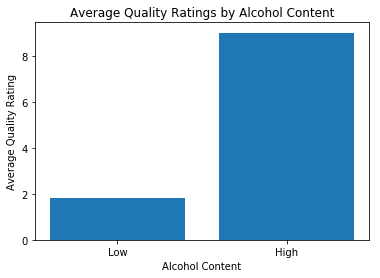

In [14]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');


### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [7]:
# Use query to select each group and get its mean quality
median = df['residual_sugar'].median()
low = df.query('residual_sugar < {}'.format(median))
high = df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['residual_sugar'].mean()
mean_quality_high = high['residual_sugar'].mean()

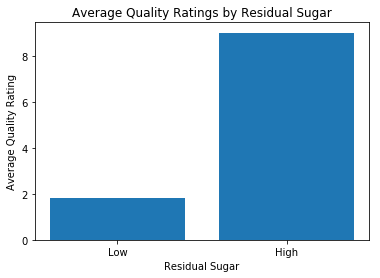

In [8]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [20]:
# Use groupby to get the mean quality for each acidity level
mean_acidity = df.groupby(['acidity_levels']).mean().quality

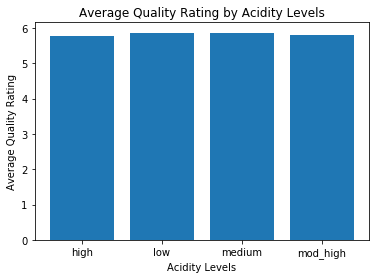

In [24]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = []
for i in mean_acidity:
    heights.append(i)
heights
labels = ['high', 'low', 'medium', 'mod_high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

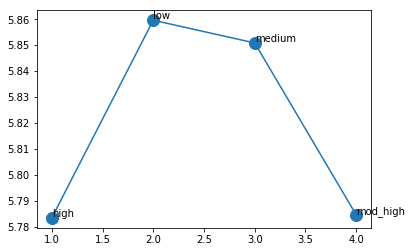

In [71]:
labels = ['high', 'low', 'medium', 'mod_high']
plt.plot(locations, heights, 'o-', label = 'line 1', markersize=12)

for i in range(0,len(labels)):
    plt.annotate(labels[i], (locations[i]+0.0005, heights[i]+0.0005))

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?